# Projekt 1 - eksploracja danych

Eksplorowany przez nas zbiór danych dotyczy wyników partii szachowej, kiedy dochodzi do sytuacji, gdy na planszy zostają biały król, biała wieża i czarny król. Dostępny jest pod adresem https://www.apispreadsheets.com/datasets/115.

## Załadowanie potrzebnych pakietów

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings

In [3]:
warnings.filterwarnings('ignore')

## Wczytanie i sprawdzenie danych

In [4]:
chess_df = pd.read_csv('chess_king_rook_dataset.csv')
chess_df['result'].unique()

array(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen', 'sixteen'], dtype=object)

In [5]:
chess_df

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [6]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   white_king_file  28056 non-null  object
 1   white_king_rank  28056 non-null  int64 
 2   white_rook_file  28056 non-null  object
 3   white_rook_rank  28056 non-null  int64 
 4   black_king_file  28056 non-null  object
 5   black_king_rank  28056 non-null  int64 
 6   result           28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


Powyżej widać, że nasz zbiór danych nie zawiera żadnych wartości null, a więc jest pozbawiony braków danych. Składa się z 28056 rekordów i zaledwie 7 kolumn. Sprawdźmy teraz, co oznaczają kolumny w nim zawarte oraz jakiego są typu.

In [7]:
attributes_df = pd.read_csv('attributes_chess_king_rook.csv')
pd.set_option('display.max_colwidth', 150)
attributes_df

,name,type,description
0,white_king_file,string,Column location on the chess board of the white king
1,white_king_rank,string,Row location on the chess board of the white king
2,white_rook_file,string,Column location on the chess board of the white rook
3,white_rook_rank,string,Row location on the chess board of the white rook
4,black_king_file,string,Column location on the chess board of the black king
5,black_king_rank,string,Row location on the chess board of the black king
6,result,string,"Predictor Class. optimal depth-of-win for White in 0 to 16 moves, otherwise drawn Values: {draw, zero, one, two, ..., sixteen}"


Według stworzonej przez autora ramki *attributes* każda z 7 kolumn jest typu string. Jednak funkcja *info()* użyta powyżej zwróciła nam inne informacje. Widzimy, że kolumny *white_king_rank*, *white_rook_rank* oraz *black_king_rank* są typu int, zaś reszta kolumn typu object. Pierwsze 6 dotyczy położenia każdej z 3 figur na planszy, a ostatnia zawiera informację o wyniku partii. Wszystkie zmienne w naszej ramce są typu dyskretnego.

In [8]:
chess_df.duplicated().value_counts()

False    28056
dtype: int64

Jak widać, nie mamy powtórzeń rekordów w naszym zbiorze danych. Sprawdźmy, ile unikalnych wartości ma każda z kolumn.

In [9]:
chess_df.nunique()

white_king_file     4
white_king_rank     4
white_rook_file     8
white_rook_rank     8
black_king_file     8
black_king_rank     8
result             18
dtype: int64

## Podział zbioru danych na próbkę treningową i próbkę testową

In [10]:
pd.set_option('display.max_rows', 10,'display.max_columns',15)

# Podział warstwowy według result
chess_train, chess_test = train_test_split(chess_df, test_size=0.3, random_state=42, stratify=chess_df['result'])

## Eksploracja próbki treningowej

Spójrzmy, jak przedstawiają się rozkłady zmiennych.

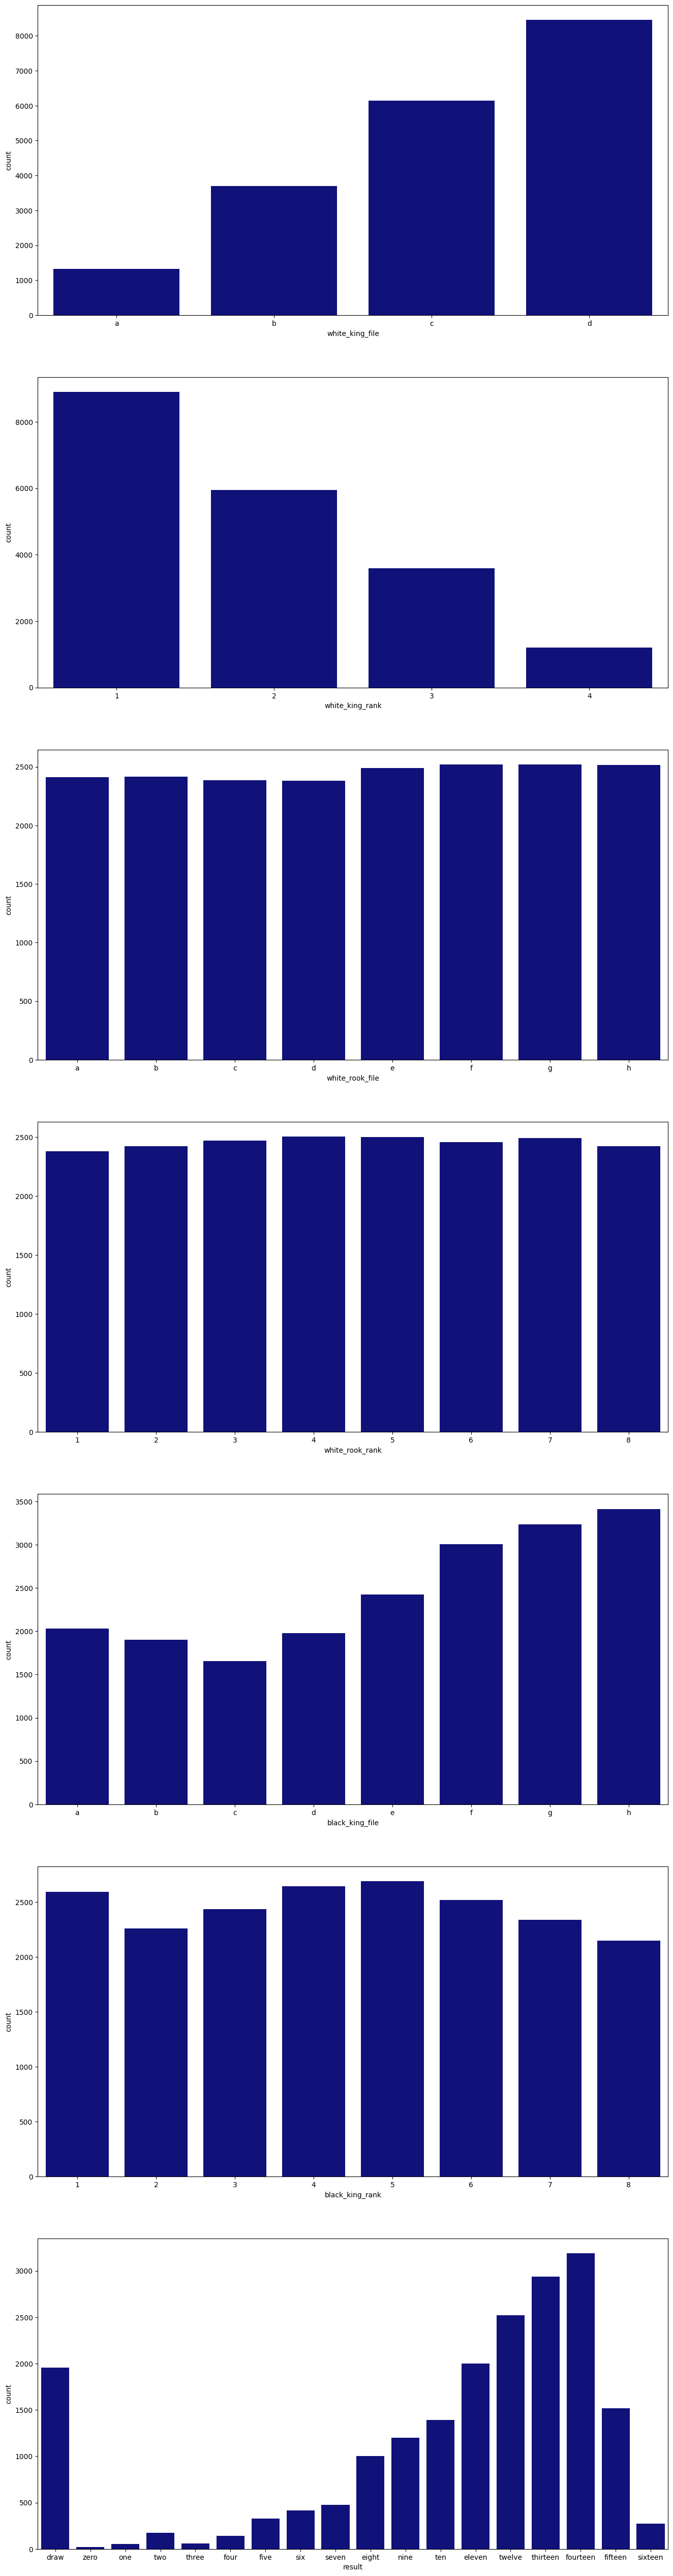

In [11]:
fig, axs = plt.subplots(nrows = 7, figsize = (16,65))
sns.countplot(data = chess_train, x = 'white_king_file', order  = ['a', 'b', 'c', 'd'], ax=axs[0], color = 'darkblue')
sns.countplot(data = chess_train, x = 'white_king_rank', ax=axs[1], color = 'darkblue')
sns.countplot(data = chess_train, x = 'white_rook_file', order = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], ax=axs[2], color = 'darkblue')
sns.countplot(data = chess_train, x = 'white_rook_rank', ax=axs[3], color = 'darkblue')
sns.countplot(data = chess_train, x = 'black_king_file', order = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], ax=axs[4], color = 'darkblue')
sns.countplot(data = chess_train, x = 'black_king_rank', ax=axs[5], color = 'darkblue')
sns.countplot(data = chess_train, x = 'result', order = ['draw', 'zero', 'one', 'two', 'three',  'four', 'five', 'six',
                                                        'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
                                                        'fourteen', 'fifteen', 'sixteen'], ax=axs[6], color = 'darkblue')
plt.show()

Patrząc na powyższe rozkłady widzimy, że obszar ruchów białego króla nie jest specjalnie wielki, w przypadku pozostałych figur zakres pól jest bardziej zróżnicowany. Mimo korzystnej dla białych figur sytuacji, widzimy tu dość sporą ilość remisów, jednak dalej znacznie częściej wygrywają białe, zwykle w kilkunastu ruchach. Wygląda na to, że zbiór nie wymaga bardzo dużo transformacji, nie ma także widocznych outlierów. Jednak by móc wyciągnąć ciekawsze wnioski, musimy przeanalizować zależności między położeniem figur i wprowadzić pewne modyfikacje w naszej ramce danych.

Zanim przejdziemy do dokładnej analizy, należy przeprowadzić encoding.

## Encoding
Jako, że wszystkie kolumny prócz *result* reprezentują współrzędne figur szachowych, zdecydowałyśmy się przedstawić położenie w kolumnie danej figury (aktualnie reprezentowane alfabetem) za pomocą liczb - od 1 do 8 przyporządkowane w kolejności alfabetycznej. Wartości kolumny *result* to liczby ruchów (od 0 do 16), po których "białe" wygrały - wystarczy przekształcić je z tekstu na liczbę, wartość "draw", która oznacza remis czyli wygrana nawet przy zwiększonej ilości ruchów byłaby niemożliwa - oznaczymy ją zatem jako 100. Wybrałyśmy wartość 100, ponieważ gracz dąży do jak najszybszej wygranej - wartość "-1" sugerowałaby, że draw jest lepszym rezultatem niż 0, natomiast draw jest istotnie gorszym rezultatem rozgrywki niż wszystkie pozostałe, bo nigdy nie osiąga wygranej.

In [12]:
def result_encoding(df):
    text2int = {"result":     {"zero": 0, "one":1, "two":2, "three":3, "four":4, "five":5, "six":6, "seven":7, "eight":8,
                               "nine":9, "ten":10, "eleven":11, "twelve":12, "thirteen":13, "fourteen":14, "fifteen":15,
                               "sixteen":16, "draw":100}}
    if df['result'].dtype == 'object':
        df = df.replace(text2int)
    return df

In [13]:
def alphabet_encoding(df):
    for column in df:
        if df[column].dtype == 'object' and column != 'result':
            df[column]= df[column].apply(lambda x: ord(x)-96)
    return

In [14]:
alphabet_encoding(chess_train)
chess_train =result_encoding(chess_train)

## Zależności między położeniem figur

W celu opracowania dobrego modelu, musimy przeanalizować, jak wpływa na wynik położenie figur. Zastanówmy się najpiew, kiedy może dojść do remisu. Jeśli wieża znajdzie się w obszarze ruchu czarnego króla, a jednocześnie w bliskim otoczeniu wieży nie będzie znajdował się biały król, który mógłby ją obronić, to mamy pewny remis (czarny król zbije wieżę). Ale jeśli oba te warunki nie będą spełnione, szanse na remis są nikłe. Dlatego warto wprowadzić kolumny opisujące różnice położeń dla białego króla i białej wieży oraz czarnego króla i białej wieży.

In [15]:
chess_train['w_king_w_rook_diff'] = ((chess_train['white_king_file'] - chess_train['white_rook_file'])**2 + (chess_train['white_king_rank'] - chess_train['white_rook_rank'])**2)**(0.5)
chess_train['white_king_defending'] = np.where(chess_train['w_king_w_rook_diff'] >= 2, 0, 1)

In [16]:
chess_train['b_king_w_rook_diff'] = ((chess_train['black_king_file'] - chess_train['white_rook_file'])**2 + (chess_train['black_king_rank'] - chess_train['white_rook_rank'])**2)**(0.5)
chess_train['black_king_attacking'] = np.where(chess_train['b_king_w_rook_diff'] >= 2, 0, 1)

Wiemy, że biały król broni białej wieży, jeśli odległość między nimi jest mniejsza lub równa pierwiastek z dwóch. Tworzymy zmienną *white_king_defending*  która przyjmuje wartość 0, jeśli mamy do czynienia z odległością większą lub równą 2 (jest to równoznaczne z tym, że jest większa od pierwiastka z 2) i wartość 1 w przeciwnym wypadku. Analogicznie określamy atak czarnego króla.

Natomiast żeby określić, po ilu ruchach nastąpi zwycięstwo białych, warto znać położenie czarnego króla względem środka szachownicy oraz krawędzi. Powinno być tak, że im bliżej krawędzi (a dalej środka) w początkowym położeniu jest czarny król, tym mniej ruchów potrzebują białe figury do zwycięstwa (szybciej 'zapędzają' go w róg).

In [17]:
chess_train['b_king_D5_diff'] = ((chess_train['black_king_file'] - 4)**2 + (chess_train['black_king_rank'] - 5)**2)**(0.5)
chess_train['b_king_E5_diff'] = ((chess_train['black_king_file'] - 5)**2 + (chess_train['black_king_rank'] - 5)**2)**(0.5)
chess_train['b_king_D4_diff'] = ((chess_train['black_king_file'] - 4)**2 + (chess_train['black_king_rank'] - 4)**2)**(0.5)
chess_train['b_king_E4_diff'] = ((chess_train['black_king_file'] - 5)**2 + (chess_train['black_king_rank'] - 4)**2)**(0.5)
chess_train['b_king_center_diff'] = chess_train[['b_king_D5_diff', 'b_king_E5_diff', 'b_king_D4_diff', 'b_king_E4_diff']].min(axis=1)
chess_train = chess_train.drop(['b_king_D5_diff', 'b_king_E5_diff', 'b_king_E4_diff', 'b_king_D4_diff'], axis=1)

In [18]:
chess_train['b_king_A1_diff'] = ((chess_train['black_king_file'] - 1)**2 + (chess_train['black_king_rank'] - 1)**2)**(0.5)
chess_train['b_king_A8_diff'] = ((chess_train['black_king_file'] - 1)**2 + (chess_train['black_king_rank'] - 8)**2)**(0.5)
chess_train['b_king_H1_diff'] = ((chess_train['black_king_file'] - 8)**2 + (chess_train['black_king_rank'] - 8)**2)**(0.5)
chess_train['b_king_H8_diff'] = ((chess_train['black_king_file'] - 8)**2 + (chess_train['black_king_rank'] - 1)**2)**(0.5)
chess_train['b_king_corner_diff'] = chess_train[['b_king_A1_diff', 'b_king_A8_diff', 'b_king_H1_diff', 'b_king_H8_diff']].min(axis=1)
chess_train = chess_train.drop(['b_king_A1_diff', 'b_king_A8_diff', 'b_king_H1_diff', 'b_king_H8_diff'], axis=1)

Zobaczmy, jak po takich modyfikacjach przedstawia się wykres korelacji między zmiennymi.

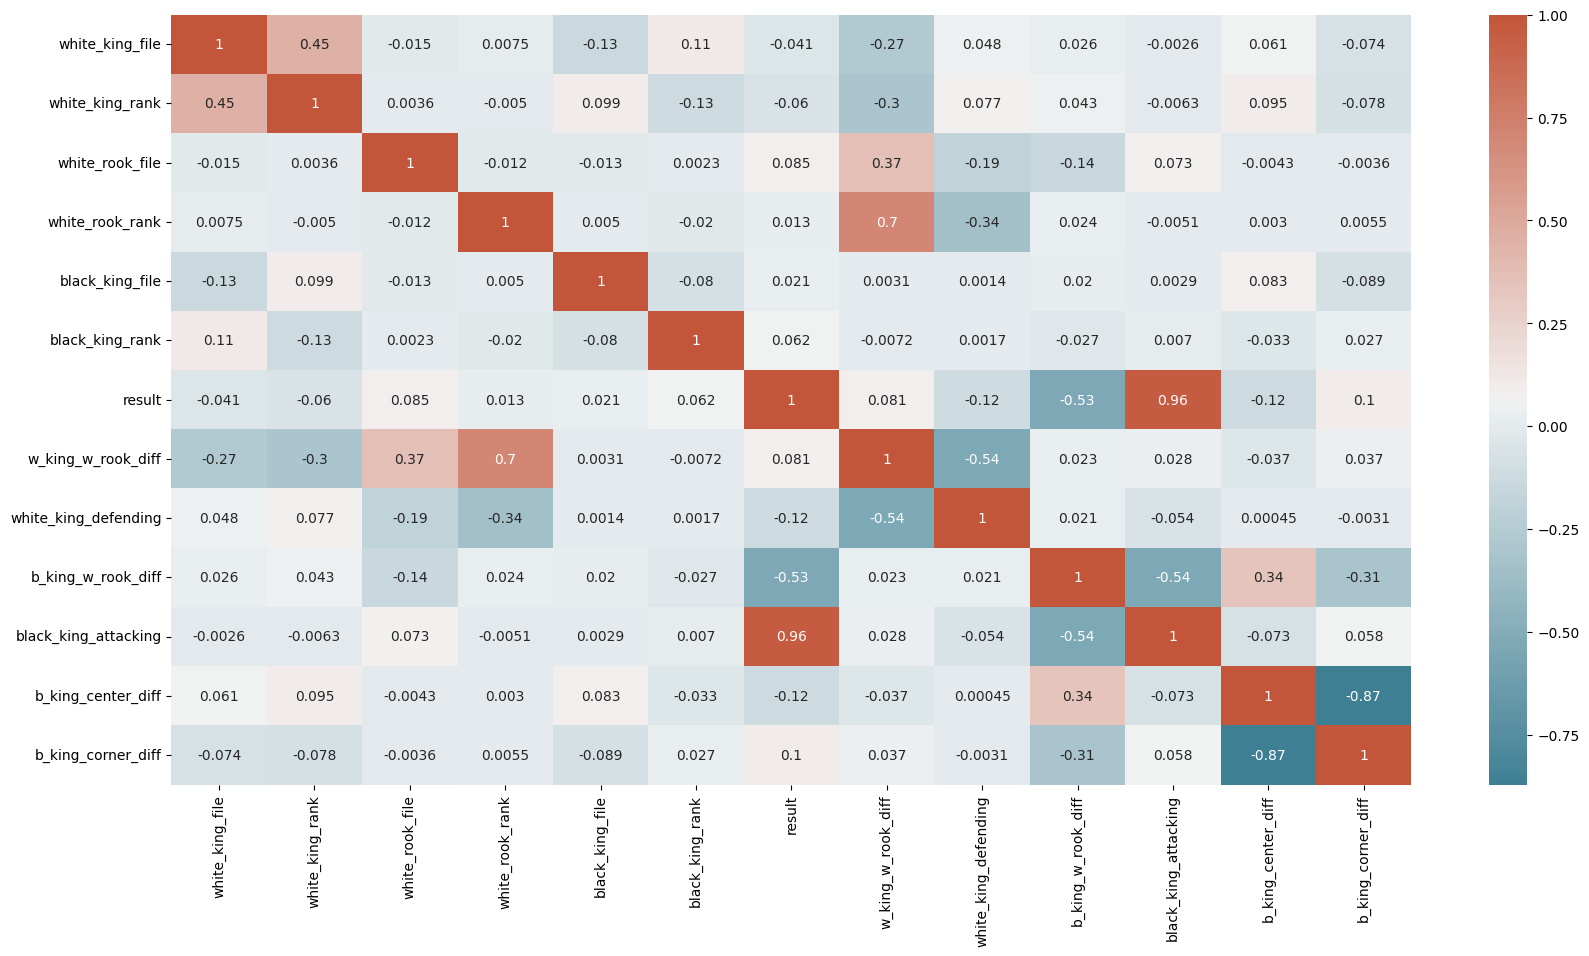

In [19]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(chess_train.corr(), annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

Widzimy, jak silnie skorelowane są kolumny *result* oraz *black_king_attacking*. Oczywiście oznacza to, że sprawdza się stwierdzenie, że przy ataku czarnego króla na wieżę, gra kończy się remisem. Zauważalna jest również silna ujemna korelacja między zmiennymi *b_king_center_diff* i *b_king_corner_diff*. Jest to zrozumiałe, jako że są to dwa przeciwstawne przypadki - czarny król znajdujący się blisko środka planszy zostanie zbity w większej ilości ruchów niż gdy znajduje się blisko rogu - i na odwrót.

In [20]:
chess_train['combined'] = chess_train['black_king_attacking'].astype(str) + chess_train['white_king_defending'].astype(str)

In [21]:
chess_train

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result,w_king_w_rook_diff,white_king_defending,b_king_w_rook_diff,black_king_attacking,b_king_center_diff,b_king_corner_diff,combined
9980,4,3,7,1,1,4,10,3.605551,0,6.708204,0,3.000000,3.000000,00
19326,3,3,4,3,5,4,13,1.000000,1,1.414214,1,0.000000,4.242641,11
19224,3,3,1,3,6,4,13,2.000000,0,5.099020,0,1.000000,3.605551,00
2887,3,3,5,7,4,1,1,4.472136,0,6.082763,0,3.000000,3.000000,00
13884,3,1,3,8,8,4,12,7.000000,0,6.403124,0,3.000000,3.000000,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24765,4,1,5,8,2,5,14,7.071068,0,4.242641,0,2.000000,3.162278,00
15136,4,1,1,3,2,8,12,3.605551,0,5.099020,0,3.605551,1.000000,00
17712,2,2,5,1,6,4,13,3.162278,0,3.162278,0,1.000000,3.605551,00
24237,4,1,1,5,3,5,14,5.000000,0,2.000000,0,1.000000,3.605551,00


Chcemy zobrazować teraz jak wygląda wynik gry dla czterech sytuacji:
1. 00 - czarny król nie atakuje wieży, ani biały król jej nie broni
2. 10 - czarny król atakuje wieżę, a biały król jej nie broni
3. 01 - czarny król nie atakuje wieży, biały król jej broni
4. 11 - czarny król atakuje wieżę, ale biały król jej broni

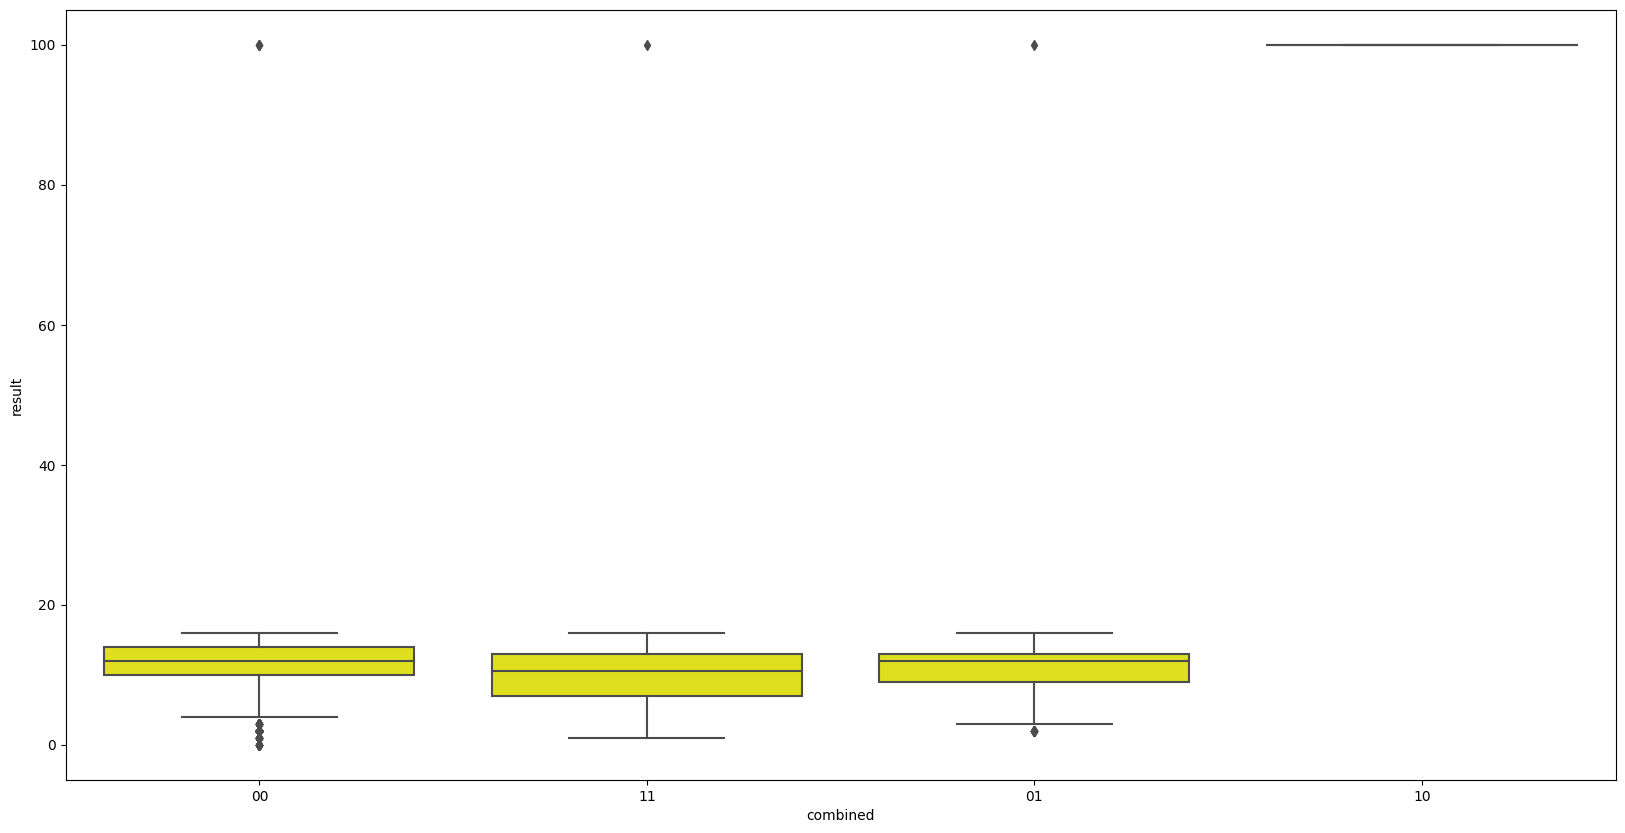

In [22]:
sns.boxplot(data = chess_train, x = 'combined', y = 'result', color = "yellow")
plt.show()

Sprawdźmy dodatkowo, ile mamy rekordów dla wszystkich możliwych wyników gry w każdej z powyższych kategorii.

In [23]:
pd.set_option('display.max_rows', 500)

In [24]:
chess_train.groupby(['combined', 'result'])['combined'].agg("count")

combined  result
00        0           19
          1           54
          2          157
          3           43
          4          113
          5          274
          6          350
          7          391
          8          880
          9         1038
          10        1223
          11        1744
          12        2238
          13        2618
          14        2857
          15        1371
          16         254
          100          3
01        2           14
          3           12
          4           21
          5           49
          6           54
          7           79
          8          116
          9          152
          10         156
          11         243
          12         268
          13         309
          14         319
          15         135
          16          14
          100          1
10        100       1952
11        1            1
          2            1
          3            2
          4            5
        

In [25]:
chess_train2 = chess_train.loc[chess_train['result'] < 100]

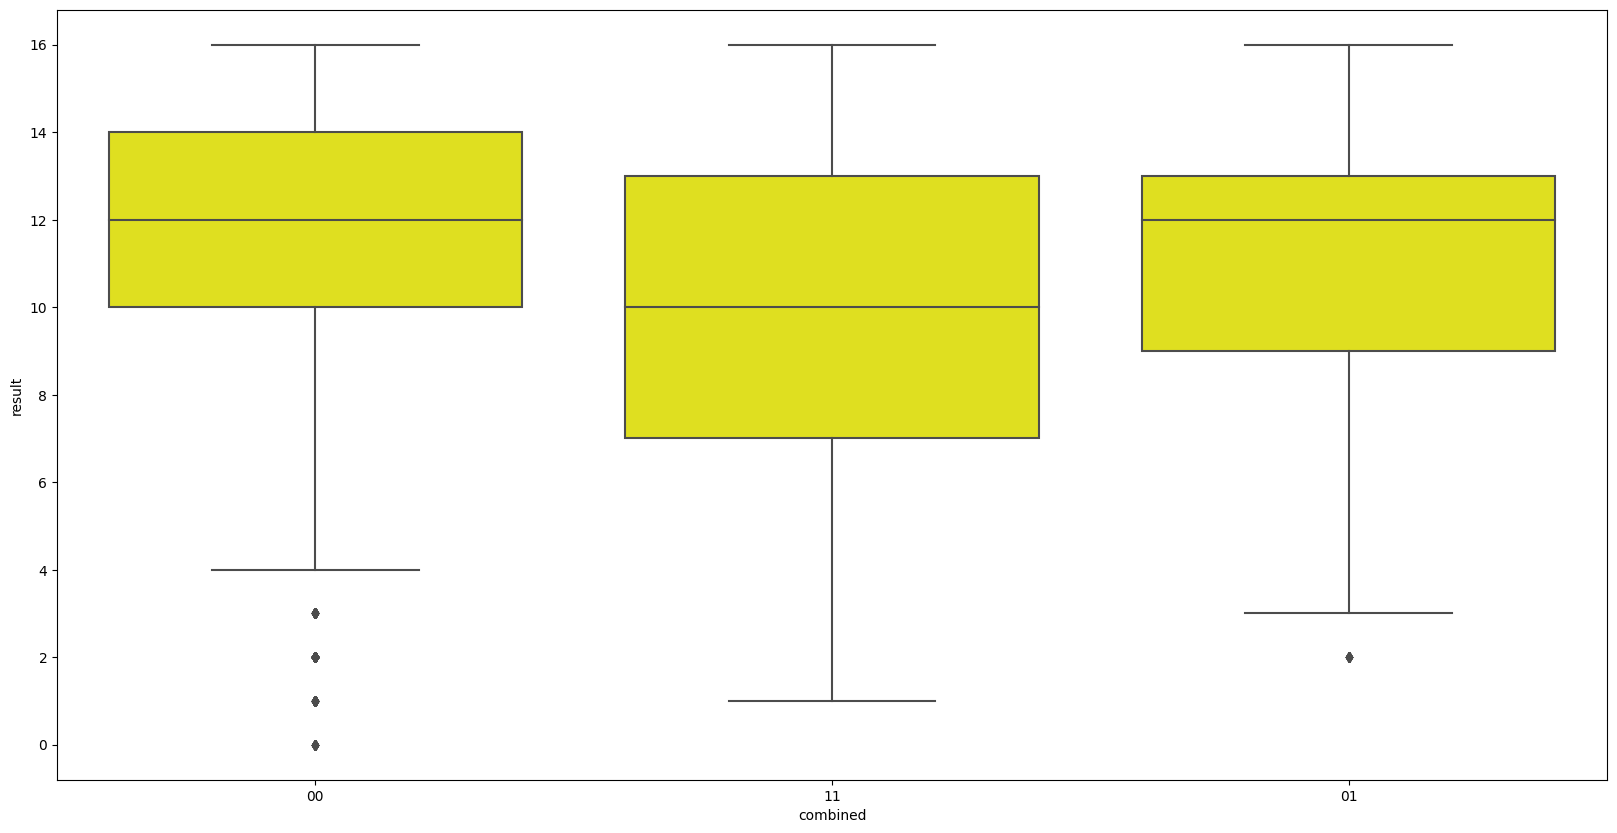

In [26]:
sns.boxplot(data = chess_train2, x = 'combined', y = 'result', color = "yellow")
plt.show()

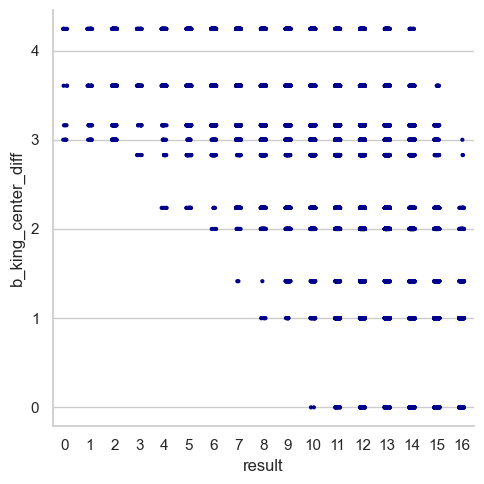

In [27]:
sns.set(style = 'whitegrid')  
       
sns.catplot(y='b_king_center_diff', x='result', data=chess_train2, s = 3, color = "darkblue")
  
plt.show()

Widzimy, że gdy czarny król był najbliżej środka, najmniejsza liczba ruchów w jakiej wygrały białe figury wynosiła dopiero 10. Przy największej odległości od środka, zwycięstwo następowało już czasem po 0-1 ruchu.

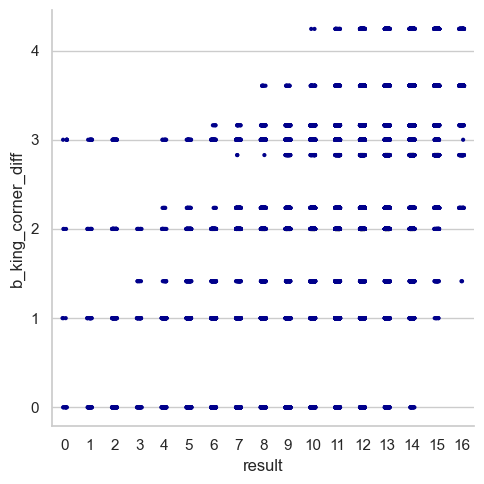

In [28]:
sns.set(style = 'whitegrid')  
       
sns.catplot(y='b_king_corner_diff', x='result', data=chess_train2, s = 3, color = "darkblue")
  
plt.show()

Tutaj widzimy odwrotną sytuację - przy dalszej czarnego króla odległości od rogu, białe figury wygrywały dopiero po minimum 10 ruchach. Widać wysoką ujemną korelację (bliska odległość od rogu = daleka od środka i na odwrót). Przy tworzeniu modelu nie będziemy potrzebować obu kolumn, zatem usuńmy *b_king_center_diff*.

In [49]:
chess_train = chess_train.drop('b_king_center_diff', axis=1)

## Walidacja

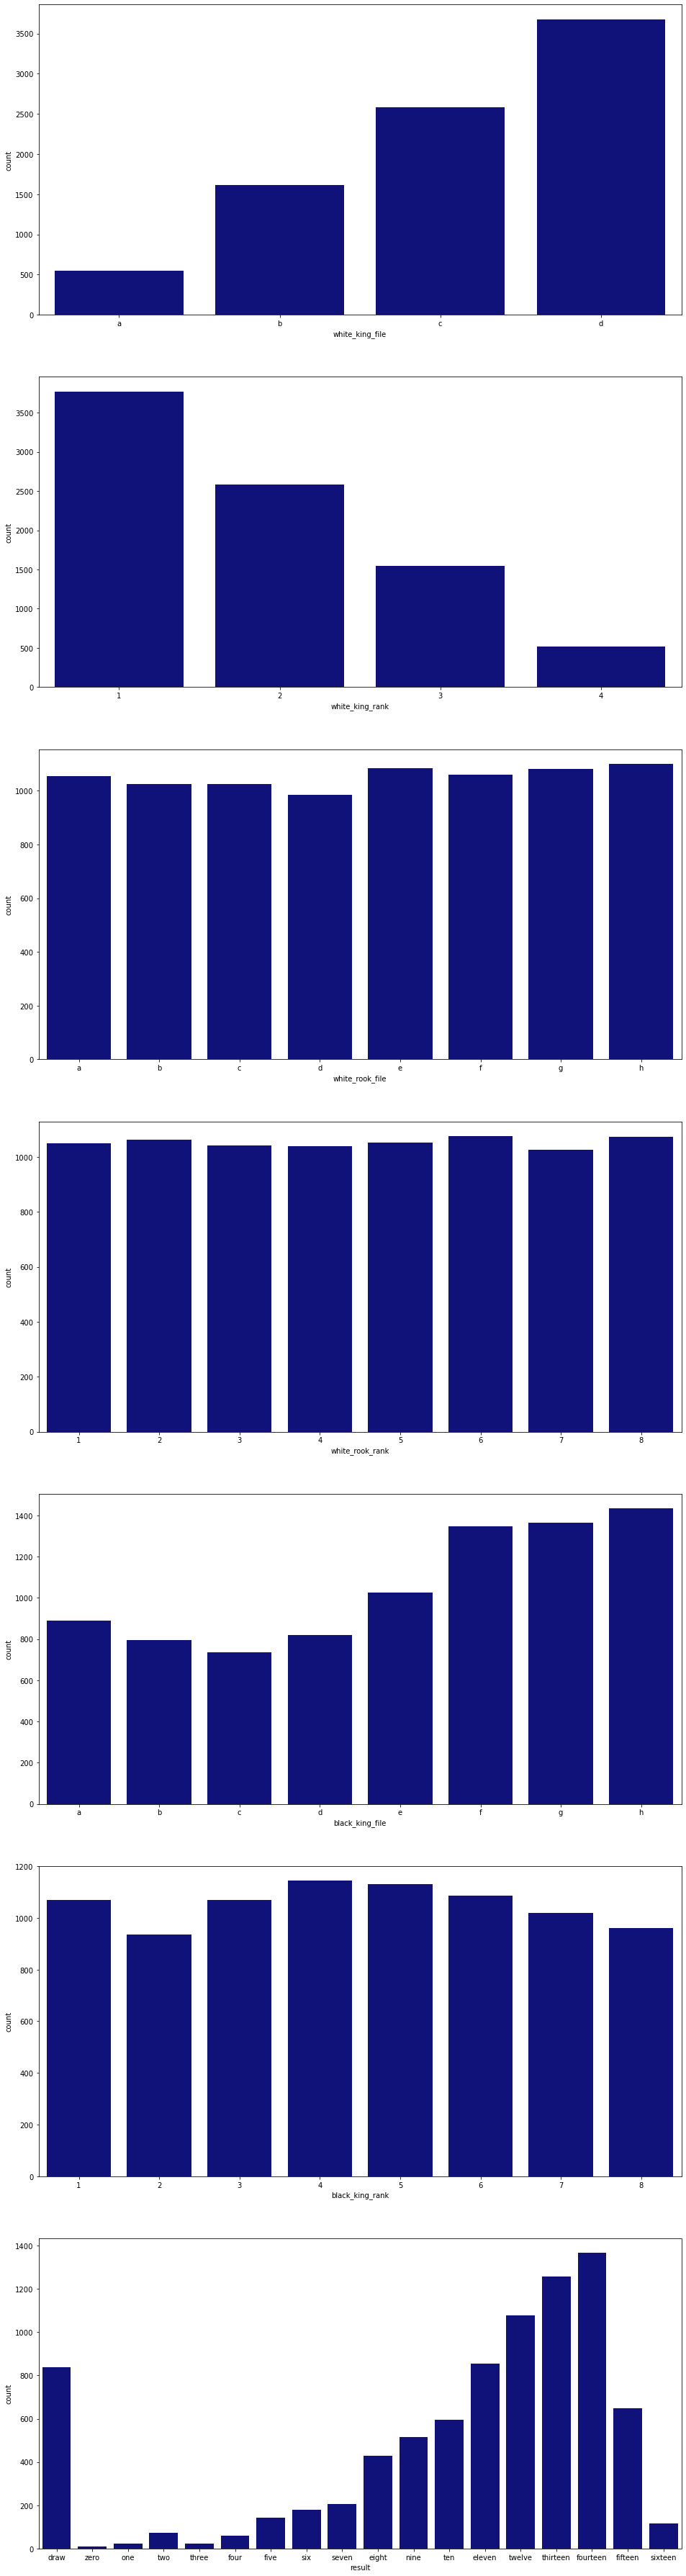

In [74]:
fig, axs = plt.subplots(nrows = 7, figsize = (16,65))
sns.countplot(data = chess_test, x = 'white_king_file', order  = ['a', 'b', 'c', 'd'], ax=axs[0], color = 'darkblue')
sns.countplot(data = chess_test, x = 'white_king_rank', ax=axs[1], color = 'darkblue')
sns.countplot(data = chess_test, x = 'white_rook_file', order = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], ax=axs[2], color = 'darkblue')
sns.countplot(data = chess_test, x = 'white_rook_rank', ax=axs[3], color = 'darkblue')
sns.countplot(data = chess_test, x = 'black_king_file', order = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], ax=axs[4], color = 'darkblue')
sns.countplot(data = chess_test, x = 'black_king_rank', ax=axs[5], color = 'darkblue')
sns.countplot(data = chess_test, x = 'result', order = ['draw', 'zero', 'one', 'two', 'three',  'four', 'five', 'six',
                                                        'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
                                                        'fourteen', 'fifteen', 'sixteen'], ax=axs[6], color = 'darkblue')
plt.show()

Rozkłady wyglądają niemalże identycznie jak te dla próbki treningowej.

In [29]:
alphabet_encoding(chess_test)
chess_test =result_encoding(chess_test)

In [30]:
chess_test['w_king_w_rook_diff'] = ((chess_test['white_king_file'] - chess_test['white_rook_file'])**2 + (chess_test['white_king_rank'] - chess_test['white_rook_rank'])**2)**(0.5)
chess_test['white_king_defending'] = np.where(chess_test['w_king_w_rook_diff'] >= 2, 0, 1)

chess_test['b_king_w_rook_diff'] = ((chess_test['black_king_file'] - chess_test['white_rook_file'])**2 + (chess_test['black_king_rank'] - chess_test['white_rook_rank'])**2)**(0.5)
chess_test['black_king_attacking'] = np.where(chess_test['b_king_w_rook_diff'] >= 2, 0, 1)

In [32]:
chess_test['b_king_D5_diff'] = ((chess_test['black_king_file'] - 4)**2 + (chess_test['black_king_rank'] - 5)**2)**(0.5)
chess_test['b_king_E5_diff'] = ((chess_test['black_king_file'] - 5)**2 + (chess_test['black_king_rank'] - 5)**2)**(0.5)
chess_test['b_king_D4_diff'] = ((chess_test['black_king_file'] - 4)**2 + (chess_test['black_king_rank'] - 4)**2)**(0.5)
chess_test['b_king_E4_diff'] = ((chess_test['black_king_file'] - 5)**2 + (chess_test['black_king_rank'] - 4)**2)**(0.5)
chess_test['b_king_center_diff'] = chess_test[['b_king_D5_diff', 'b_king_E5_diff', 'b_king_D4_diff', 'b_king_E4_diff']].min(axis=1)
chess_test = chess_test.drop(['b_king_D5_diff', 'b_king_E5_diff', 'b_king_E4_diff', 'b_king_D4_diff'], axis=1)

In [33]:
chess_test['b_king_A1_diff'] = ((chess_test['black_king_file'] - 1)**2 + (chess_test['black_king_rank'] - 1)**2)**(0.5)
chess_test['b_king_A8_diff'] = ((chess_test['black_king_file'] - 1)**2 + (chess_test['black_king_rank'] - 8)**2)**(0.5)
chess_test['b_king_H1_diff'] = ((chess_test['black_king_file'] - 8)**2 + (chess_test['black_king_rank'] - 8)**2)**(0.5)
chess_test['b_king_H8_diff'] = ((chess_test['black_king_file'] - 8)**2 + (chess_test['black_king_rank'] - 1)**2)**(0.5)
chess_test['b_king_corner_diff'] = chess_test[['b_king_A1_diff', 'b_king_A8_diff', 'b_king_H1_diff', 'b_king_H8_diff']].min(axis=1)
chess_test = chess_test.drop(['b_king_A1_diff', 'b_king_A8_diff', 'b_king_H1_diff', 'b_king_H8_diff'], axis=1)

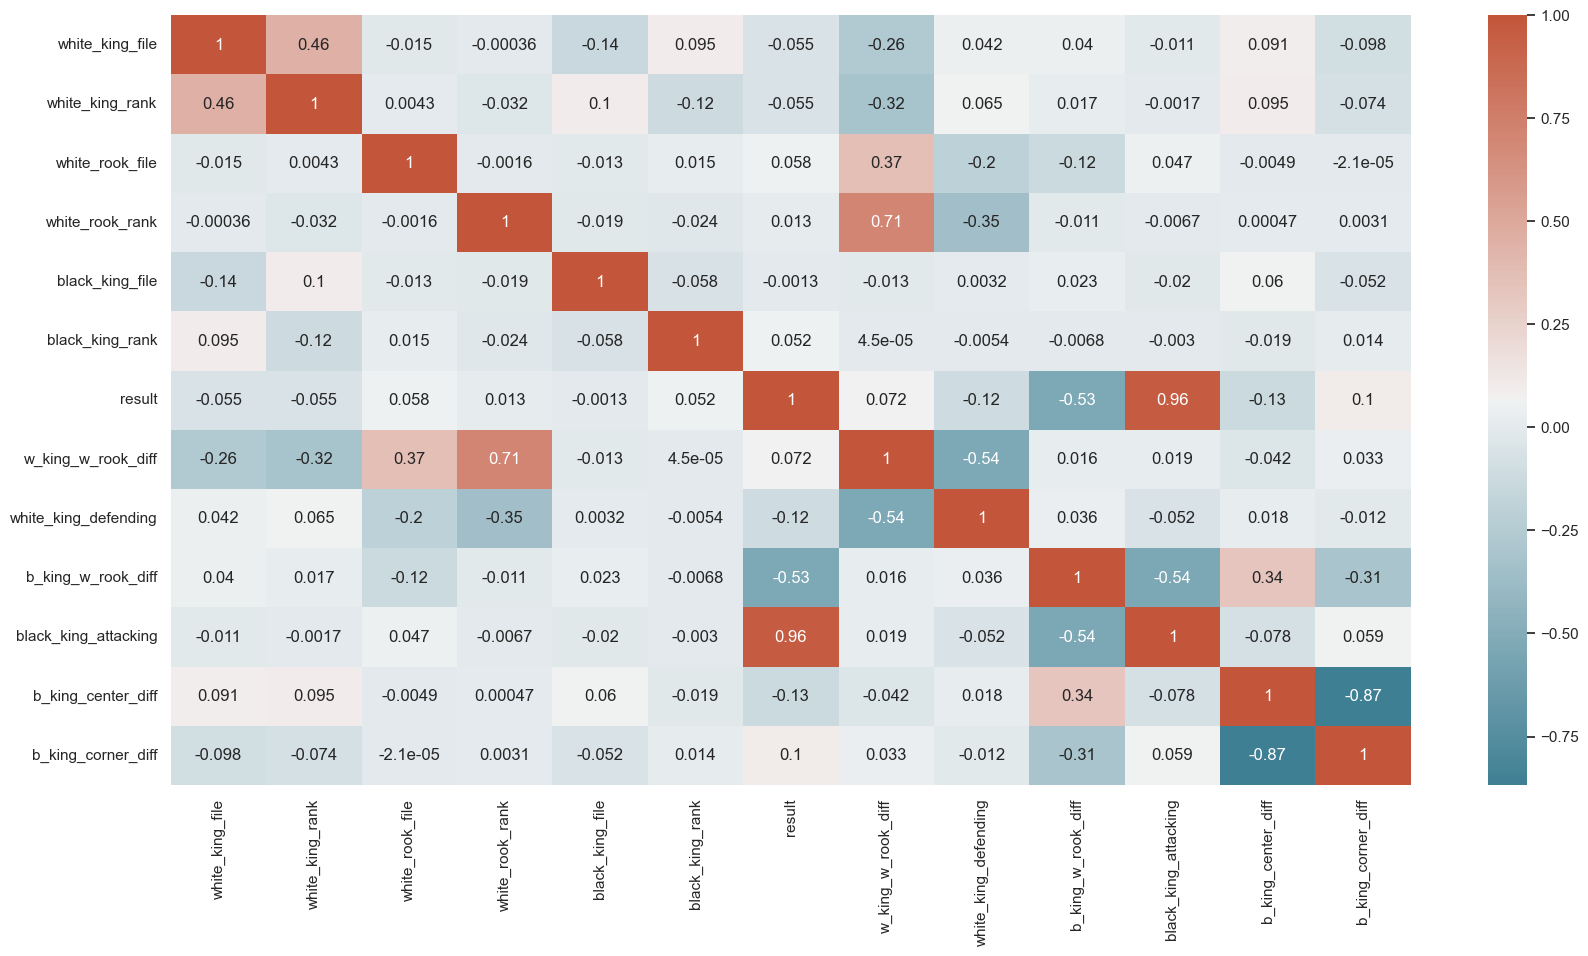

In [35]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(chess_test.corr(), annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

Korelacje zgadzają się z próbką treningową.

In [40]:
chess_test['combined'] = chess_test['black_king_attacking'].astype(str) + chess_test['white_king_defending'].astype(str)

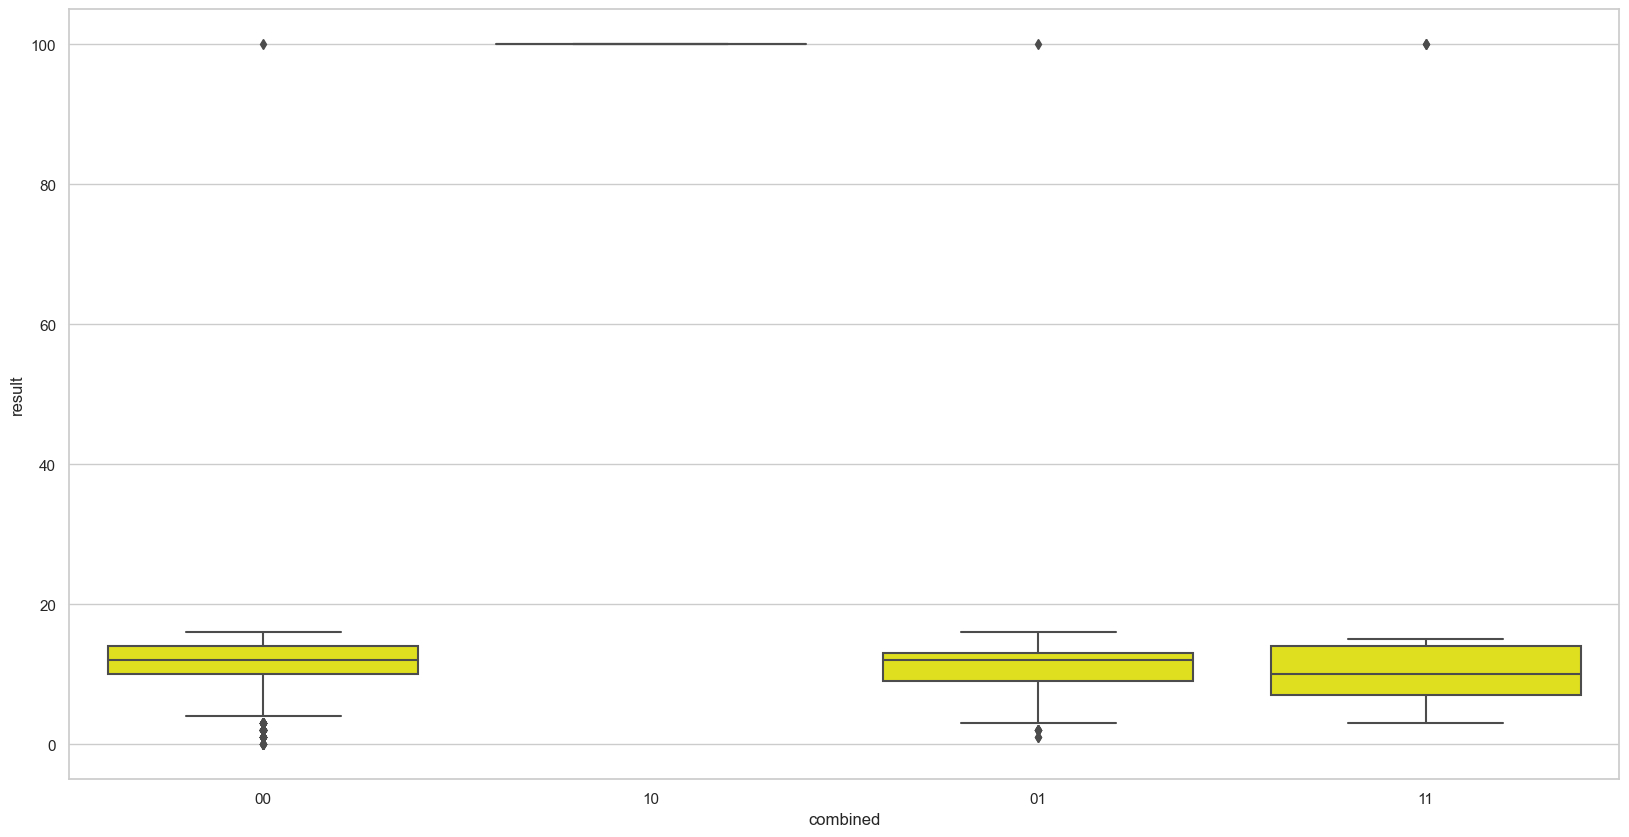

In [41]:
sns.boxplot(data = chess_test, x = 'combined', y = 'result', color = "yellow")
plt.show()

In [42]:
chess_test.groupby(['combined', 'result'])['combined'].agg("count")

combined  result
00        0            8
          1           21
          2           69
          3           20
          4           43
          5          120
          6          144
          7          175
          8          365
          9          442
          10         532
          11         749
          12         969
          13        1099
          14        1240
          15         577
          16         110
          100          1
01        1            2
          2            5
          3            1
          4           13
          5           16
          6           33
          7           25
          8           61
          9           67
          10          61
          11         104
          12         107
          13         156
          14         119
          15          67
          16           7
          100          1
10        100        835
11        3            3
          4            3
          5            5
        

In [43]:
chess_test2 = chess_test.loc[chess_test['result'] < 100]

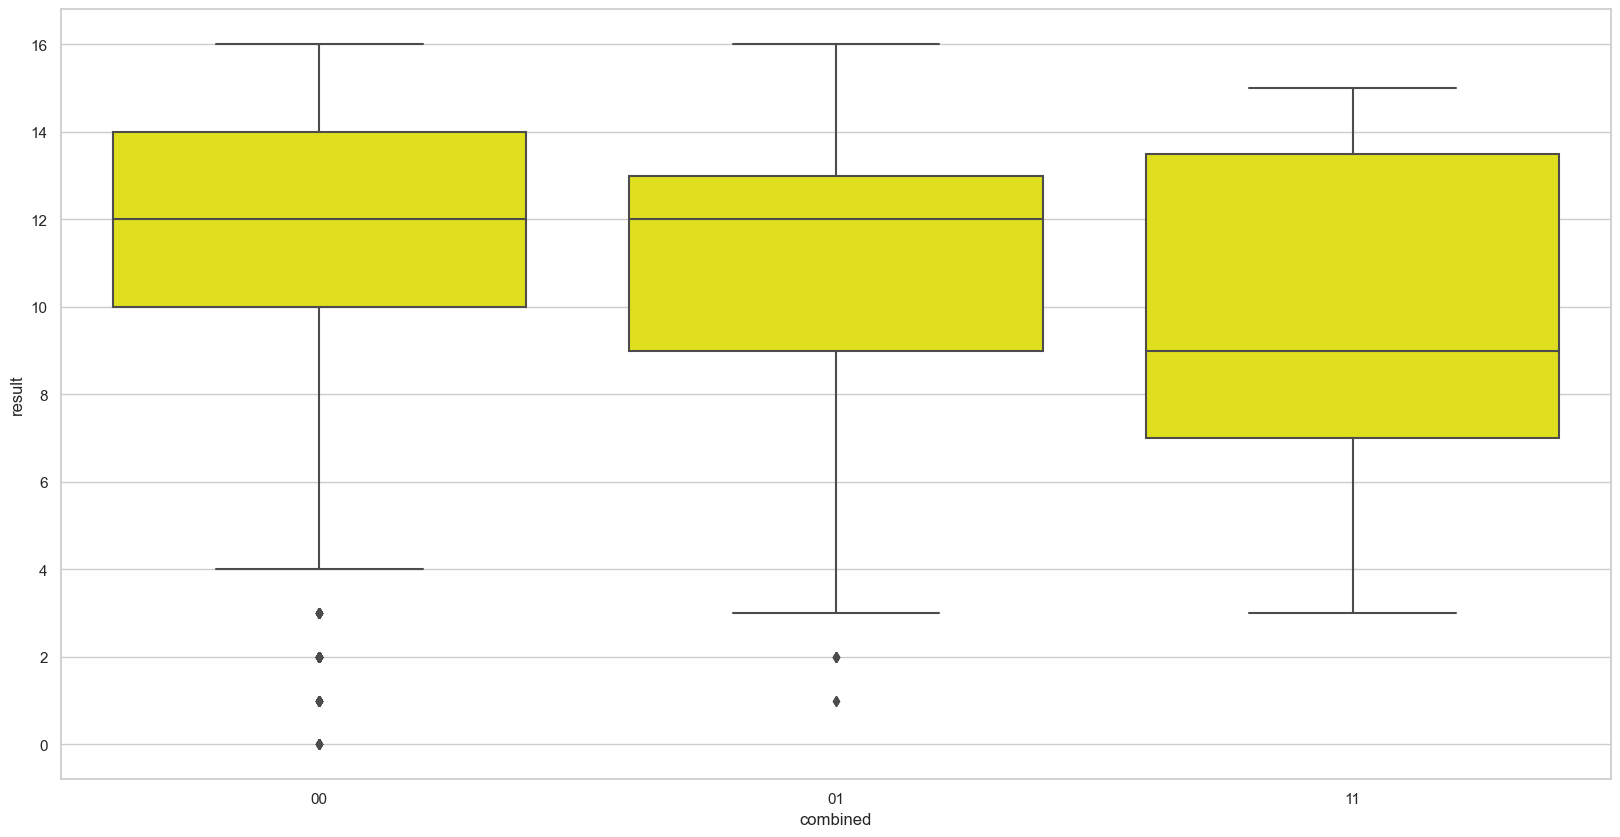

In [44]:
sns.boxplot(data = chess_test2, x = 'combined', y = 'result', color = "yellow")
plt.show()

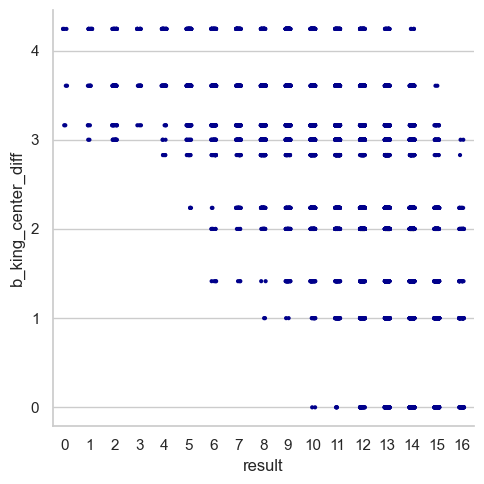

In [45]:
sns.set(style = 'whitegrid')  
       
sns.catplot(y='b_king_center_diff', x='result', data=chess_test2, s = 3, color = "darkblue")
  
plt.show()

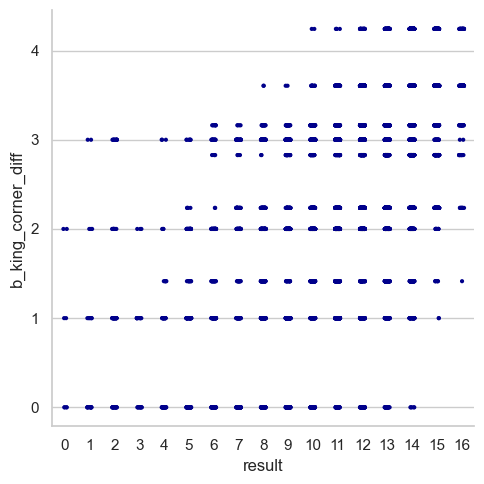

In [46]:
sns.set(style = 'whitegrid')  
       
sns.catplot(y='b_king_corner_diff', x='result', data=chess_test2, s = 3, color = "darkblue")
  
plt.show()

In [51]:
chess_test = chess_test.drop('b_king_center_diff', axis=1)

In [52]:
chess_train.to_csv('chess_train.csv', index=False)
chess_test.to_csv('chess_test.csv', index = False)